# Задание

    Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в еонкретном регионе от времени,

    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

    в) количество отказов компьютера,

    г) число обращений в поликлинику по району,

    д) координаты автобуса при движении по маршруту,

    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

    

а - можно
б - нельзя, но если например условием будет непрерывнй набор скорости до достижения определённой точки в пути и после её достижения - непрерывный сброс скорости до самой посадки, то можно
в - нельзя, если мы не будем замерять их количество в определённый промежуток времени, жень\час\месяц\неделя...
г - нельзя, но аналогично с пунктов В
д - можно
е - можно

# Задание
Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [15]:
%matplotlib inline
# !pip install pandas_profiling
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns
import pandas_profiling

from sklearn.metrics import mean_squared_error

In [6]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [10]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


    В датасэте есть два параметра. Datetime содержащий ГГГГ ММ ДД ЧЧ и число с плавающей точкой с точностью до единиц

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


    В датасэте 119 068 записей за период с 2005-12-31 01:00:00 по 2018-01-01 00:00:00.

In [11]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


    Проверим датасет на пропуски

In [12]:
data['DUQ_MW'].isnull().sum()

0

    Ни одна запись не пропущена

Text(0, 0.5, 'МВт')

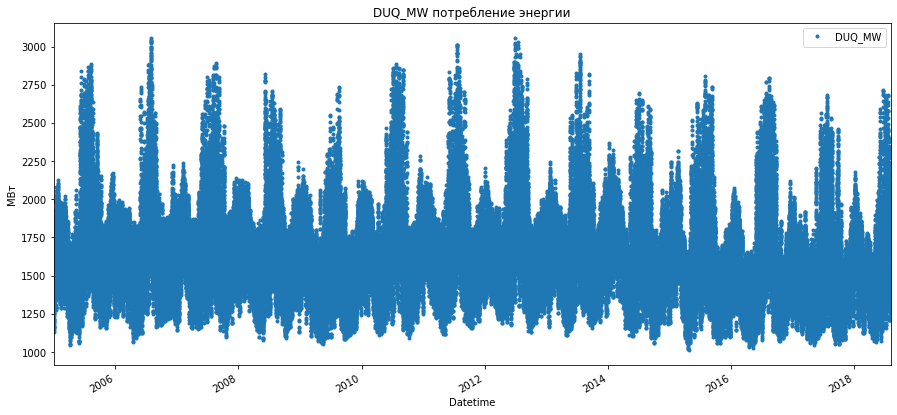

In [13]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ_MW потребление энергии' )
plt.ylabel ( 'МВт' )

    Ожидаемо неблюдается сезонность. Каких-то аномалей на первый взгляд не обнаружено. Прогоним жатасет через профайлер.

In [18]:
pandas_profiling.ProfileReport(data)
#Господи! Я мечтал о такой штуке с детства!

    К несчастью на таком малом по количеству параметров датасете, профайлер ничего не покажет :(. Чтож, преобразуем данныые из float в int и будем радоваться крутоте урока :)

In [20]:
data['DUQ_MW'] = data['DUQ_MW'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null int64
dtypes: int64(1)
memory usage: 1.8 MB


qwqw

In [64]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [65]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
Значение    2667 non-null float64
dtypes: float64(1)
memory usage: 41.7 KB


In [66]:
brent_data.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


In [67]:
brent_data[brent_data['Значение'].isnull()].count()

Значение    0
dtype: int64

Text(0.5, 0, 't')

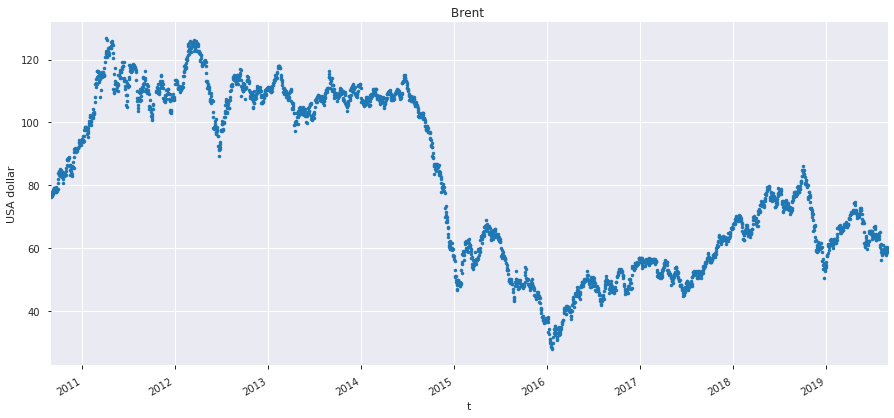

In [72]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

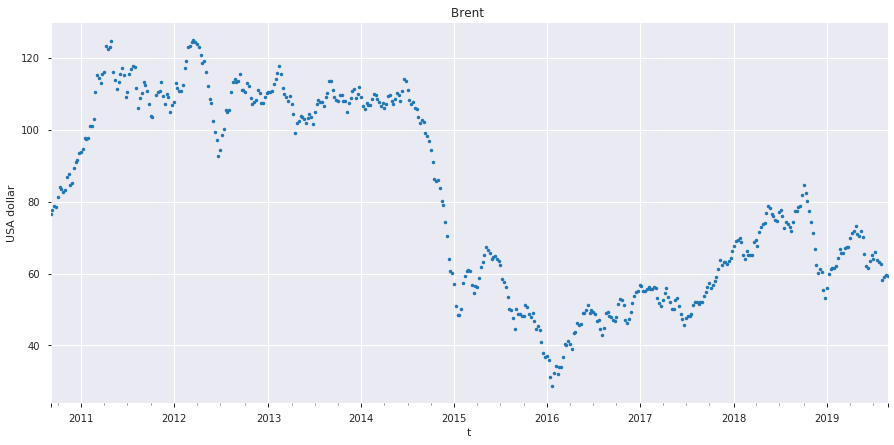

In [82]:
brent_data_w = brent_data.copy().resample("W").mean()
_ = brent_data_w['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

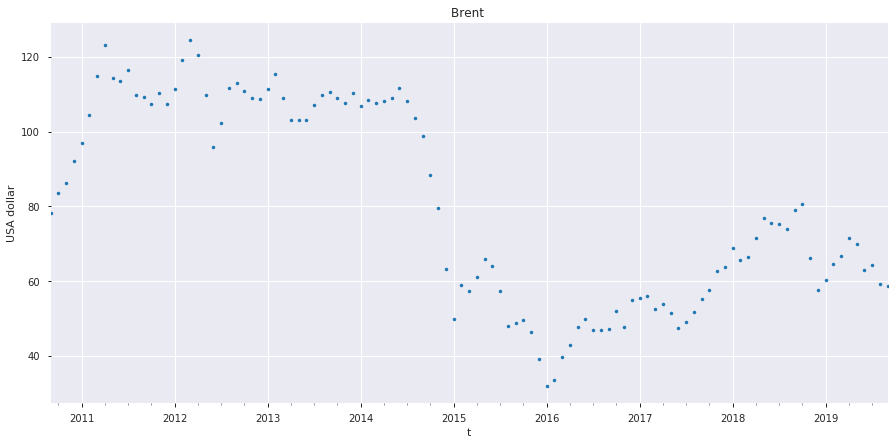

In [80]:
brent_data_m = brent_data.copy().resample("M").mean()
_ = brent_data_m['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [95]:
my_data_time = pd.date_range('1/1/2019', periods=15, freq="D")
my_data_time

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15'],
              dtype='datetime64[ns]', freq='D')

In [96]:
my_data_time_M = pd.date_range('1/1/2018', '1-1-2019', freq="M")
my_data_time_M

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [97]:
data['date'] = data.index
data.head()

,DUQ_MW,date
Datetime,,
2005-12-31 01:00:00,1458,2005-12-31 01:00:00
2005-12-31 02:00:00,1377,2005-12-31 02:00:00
2005-12-31 03:00:00,1351,2005-12-31 03:00:00
2005-12-31 04:00:00,1336,2005-12-31 04:00:00
2005-12-31 05:00:00,1356,2005-12-31 05:00:00


In [98]:
ut = data['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


In [99]:
count_data = data['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

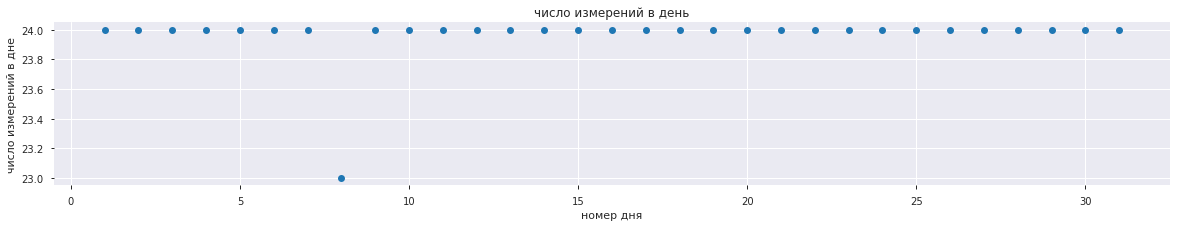

In [100]:
day_H=data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

In [101]:
Day_count = day_H.value_counts() 
Day_count[Day_count != 24]

8    23
Name: Datetime, dtype: int64

In [102]:
data['2015-03-08 01:00:00':'2015-03-08 06:00:00'].index

DatetimeIndex(['2015-03-08 01:00:00', '2015-03-08 02:00:00',
               '2015-03-08 04:00:00', '2015-03-08 05:00:00',
               '2015-03-08 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

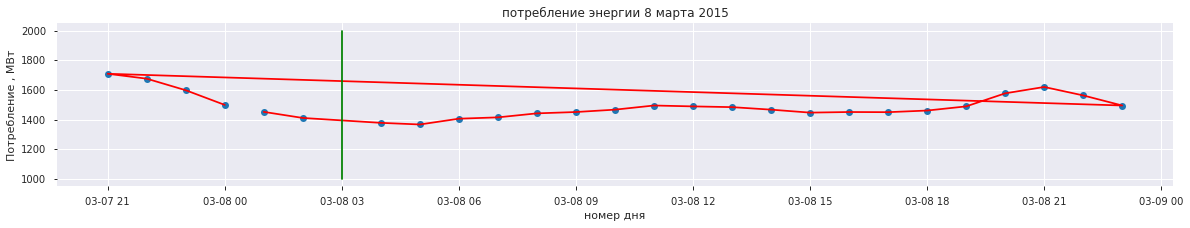

In [106]:
plt.figure(figsize=(20,3))
plt.plot(data['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'o')
plt.plot(data['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'r')
line_ = pd.to_datetime(pd.Series(['2015-03-08 03:00:00', '2015-03-08 03:00:00']))
plt.plot(line_,np.array([1000,2000]),'g')
plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии 8 марта 2015')

plt.show()

In [107]:
day_H=data['2014-03-01 00:00:00':'2014-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2014 = Day_count[Day_count != 24].index
d2014

Int64Index([9], dtype='int64')

In [108]:
day_H=data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2015 =Day_count[Day_count != 24].index
d2015

Int64Index([8], dtype='int64')

In [109]:
day_H=data['2016-03-01 00:00:00':'2016-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2016 =Day_count[Day_count != 24].index
d2016

Int64Index([13], dtype='int64')

In [110]:
day_H=data['2017-03-01 00:00:00':'2017-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2017 =Day_count[Day_count != 24].index
d2017

Int64Index([12], dtype='int64')

In [114]:
v1 = list((data['2014-03-09 02:00:00']['DUQ_MW'].values + data['2014-03-09 04:00:00']['DUQ_MW'].values) / 2)
print(v1)
v2 = list((data['2015-03-08 02:00:00']['DUQ_MW'].values + data['2015-03-08 04:00:00']['DUQ_MW'].values) / 2)
v3 = list((data['2016-03-13 02:00:00']['DUQ_MW'].values + data['2016-03-13 04:00:00']['DUQ_MW'].values) / 2)
v4 = list((data['2017-03-12 02:00:00']['DUQ_MW'].values + data['2017-03-12 04:00:00']['DUQ_MW'].values) / 2)
v =np.reshape([v1[0],v2[0],v3[0],v4[0]],(4,1))
v

df_data = pd.DataFrame(index = pd.to_datetime(pd.Series(['2014-03-09 03:00:00','2015-03-08 03:00:00','2016-03-13 03:00:00','2017-03-12 03:00:00'])), columns =['DUQ_MW'] , data = v) 
df_data['date'] = df_data.index
df_data.head()
#
data = data.append(df_data,sort = False)
data.tail()
#data['2014-03-09 03:00:00'] 

[1415.0]


,DUQ_MW,date
2018-01-02 00:00:00,1721.0,2018-01-02 00:00:00
2014-03-09 03:00:00,1415.0,2014-03-09 03:00:00
2015-03-08 03:00:00,1394.5,2015-03-08 03:00:00
2016-03-13 03:00:00,1111.5,2016-03-13 03:00:00
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00


In [115]:
count_data.iloc[:4]

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
Name: date, dtype: int64

In [116]:
data.loc[count_data.iloc[:4].index]

,DUQ_MW,date
2017-11-05 02:00:00,1131.0,2017-11-05 02:00:00
2017-11-05 02:00:00,1105.0,2017-11-05 02:00:00
2014-11-02 02:00:00,1272.0,2014-11-02 02:00:00
2014-11-02 02:00:00,1240.0,2014-11-02 02:00:00
2015-11-01 02:00:00,1113.0,2015-11-01 02:00:00
2015-11-01 02:00:00,1138.0,2015-11-01 02:00:00
2016-11-06 02:00:00,1121.0,2016-11-06 02:00:00
2016-11-06 02:00:00,1107.0,2016-11-06 02:00:00


In [117]:
df = data.loc[count_data.iloc[:4].index]
df_ = df.groupby('date').mean()
df_['date'] = df_.index
print(df_)
print(df)
data.drop(count_data.iloc[:4].index)
data.shape

                     DUQ_MW                date
date                                           
2014-11-02 02:00:00  1256.0 2014-11-02 02:00:00
2015-11-01 02:00:00  1125.5 2015-11-01 02:00:00
2016-11-06 02:00:00  1114.0 2016-11-06 02:00:00
2017-11-05 02:00:00  1118.0 2017-11-05 02:00:00
                     DUQ_MW                date
2017-11-05 02:00:00  1131.0 2017-11-05 02:00:00
2017-11-05 02:00:00  1105.0 2017-11-05 02:00:00
2014-11-02 02:00:00  1272.0 2014-11-02 02:00:00
2014-11-02 02:00:00  1240.0 2014-11-02 02:00:00
2015-11-01 02:00:00  1113.0 2015-11-01 02:00:00
2015-11-01 02:00:00  1138.0 2015-11-01 02:00:00
2016-11-06 02:00:00  1121.0 2016-11-06 02:00:00
2016-11-06 02:00:00  1107.0 2016-11-06 02:00:00


(119072, 2)

In [118]:
data.drop_duplicates()
data.shape

(119072, 2)

In [119]:
data = data.append(df_,sort = False)
data.tail()

,DUQ_MW,date
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00
2014-11-02 02:00:00,1256.0,2014-11-02 02:00:00
2015-11-01 02:00:00,1125.5,2015-11-01 02:00:00
2016-11-06 02:00:00,1114.0,2016-11-06 02:00:00
2017-11-05 02:00:00,1118.0,2017-11-05 02:00:00


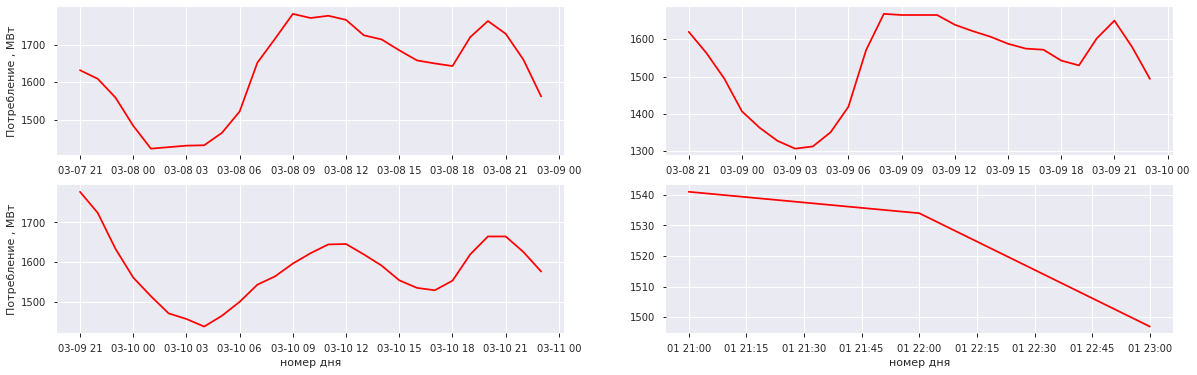

In [130]:
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
plt.plot(data['2010-03-07 21:00:00':'2010-03-8 23:00:00'].index,data['2010-03-07 21:00:00':'2010-03-08 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')

plt.subplot(2,2,2)
plt.plot(data['2015-03-08 21:00:00':'2015-03-9 23:00:00'].index,data['2015-03-08 21:00:00':'2015-03-09 23:00:00']['DUQ_MW'].values, 'r')

plt.subplot(2,2,3)
plt.plot(data['2012-03-09 21:00:00':'2012-03-10 23:00:00'].index,data['2012-03-09 21:00:00':'2012-03-10 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')
plt.xlabel('номер дня')

plt.subplot(2,2,4)
plt.plot(data['2005-01-01 21:00:00':'2005-01-01 23:00:00'].index,data['2005-01-01 21:00:00':'2005-01-01 23:00:00']['DUQ_MW'].values, 'r')
plt.xlabel('номер дня')

plt.show()

In [127]:
data.head()

,DUQ_MW,date
2005-01-01 01:00:00,1364.0,2005-01-01 01:00:00
2005-01-01 02:00:00,1273.0,2005-01-01 02:00:00
2005-01-01 03:00:00,1218.0,2005-01-01 03:00:00
2005-01-01 04:00:00,1170.0,2005-01-01 04:00:00
2005-01-01 05:00:00,1166.0,2005-01-01 05:00:00


In [123]:
data.iloc[19:26,:]

,DUQ_MW,date
2005-12-31 20:00:00,1737.0,2005-12-31 20:00:00
2005-12-31 21:00:00,1726.0,2005-12-31 21:00:00
2005-12-31 22:00:00,1669.0,2005-12-31 22:00:00
2005-12-31 23:00:00,1592.0,2005-12-31 23:00:00
2006-01-01 00:00:00,1493.0,2006-01-01 00:00:00
2005-12-30 01:00:00,1484.0,2005-12-30 01:00:00
2005-12-30 02:00:00,1419.0,2005-12-30 02:00:00


In [124]:
data = data.sort_index()

In [125]:
data.iloc[19:26,:]

,DUQ_MW,date
2005-01-01 20:00:00,1546.0,2005-01-01 20:00:00
2005-01-01 21:00:00,1541.0,2005-01-01 21:00:00
2005-01-01 22:00:00,1534.0,2005-01-01 22:00:00
2005-01-01 23:00:00,1497.0,2005-01-01 23:00:00
2005-01-02 00:00:00,1389.0,2005-01-02 00:00:00
2005-01-02 01:00:00,1251.0,2005-01-02 01:00:00
2005-01-02 02:00:00,1204.0,2005-01-02 02:00:00


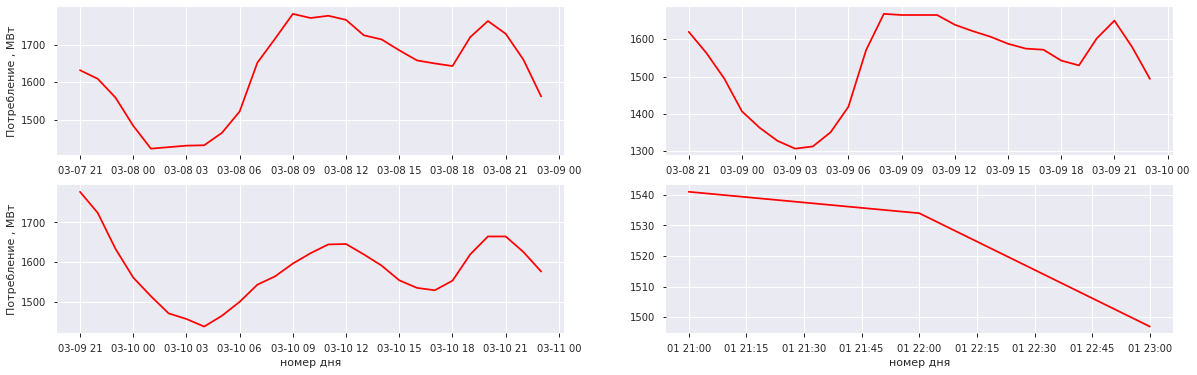

In [132]:
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
plt.plot(data['2010-03-07 21:00:00':'2010-03-8 23:00:00'].index,data['2010-03-07 21:00:00':'2010-03-08 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')

plt.subplot(2,2,2)
plt.plot(data['2015-03-08 21:00:00':'2015-03-9 23:00:00'].index,data['2015-03-08 21:00:00':'2015-03-09 23:00:00']['DUQ_MW'].values, 'r')

plt.subplot(2,2,3)
plt.plot(data['2012-03-09 21:00:00':'2012-03-10 23:00:00'].index,data['2012-03-09 21:00:00':'2012-03-10 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')
plt.xlabel('номер дня')

plt.subplot(2,2,4)
plt.plot(data['2005-01-01 21:00:00':'2005-01-01 23:00:00'].index,data['2005-01-01 21:00:00':'2005-01-01 23:00:00']['DUQ_MW'].values, 'r')
plt.xlabel('номер дня')

plt.show()

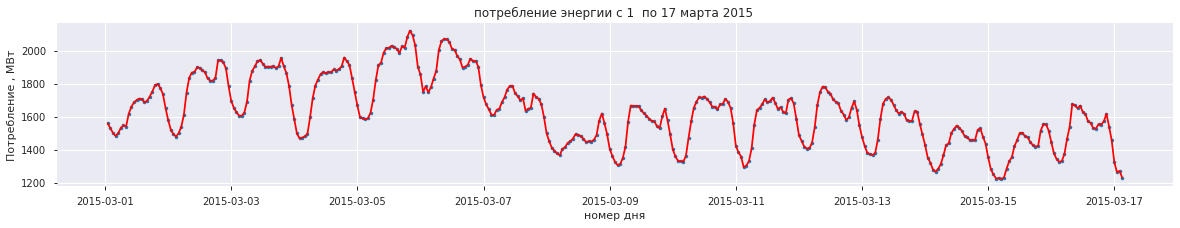

In [134]:
plt.figure(figsize=(20,3))
plt.plot(data['2015-03-01 01:00:00':'2015-03-17 03:00:00'].index,data['2015-03-01 01:00:00':'2015-03-17 03:00:00']['DUQ_MW'].values, '.')
plt.plot(data['2015-03-01 01:00:00':'2015-03-17 03:00:00'].index,data['2015-03-01 01:00:00':'2015-03-17 03:00:00']['DUQ_MW'].values, 'r')

plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии с 1  по 17 марта 2015 ')
plt.show()

In [135]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['dayofmonth'] = data['date'].dt.day
data['quarter'] = data['date'].dt.quarter
data['dayofyear'] = data['date'].dt.dayofyear
data['weekofyear'] = data['date'].dt.weekofyear
data['dayofweek'] = data['date'].dt.dayofweek
data['hour'] = data['date'].dt.hour

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119076 entries, 2005-01-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 10 columns):
DUQ_MW        119076 non-null float64
date          119076 non-null datetime64[ns]
year          119076 non-null int64
month         119076 non-null int64
dayofmonth    119076 non-null int64
quarter       119076 non-null int64
dayofyear     119076 non-null int64
weekofyear    119076 non-null int64
dayofweek     119076 non-null int64
hour          119076 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 15.0 MB


In [137]:
data.head()

,DUQ_MW,date,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour
2005-01-01 01:00:00,1364.0,2005-01-01 01:00:00,2005,1,1,1,1,53,5,1
2005-01-01 02:00:00,1273.0,2005-01-01 02:00:00,2005,1,1,1,1,53,5,2
2005-01-01 03:00:00,1218.0,2005-01-01 03:00:00,2005,1,1,1,1,53,5,3
2005-01-01 04:00:00,1170.0,2005-01-01 04:00:00,2005,1,1,1,1,53,5,4
2005-01-01 05:00:00,1166.0,2005-01-01 05:00:00,2005,1,1,1,1,53,5,5


In [138]:
data_i=pd.MultiIndex.from_arrays([data.index.date, data.index.time], names=['Date','Time'])
data.index = data_i
data.head()

DUQ_MW                date  year  month  dayofmonth  \
Date       Time                                                            
2005-01-01 01:00:00  1364.0 2005-01-01 01:00:00  2005      1           1   
           02:00:00  1273.0 2005-01-01 02:00:00  2005      1           1   
           03:00:00  1218.0 2005-01-01 03:00:00  2005      1           1   
           04:00:00  1170.0 2005-01-01 04:00:00  2005      1           1   
           05:00:00  1166.0 2005-01-01 05:00:00  2005      1           1   

                     quarter  dayofyear  weekofyear  dayofweek  hour  
Date       Time                                                       
2005-01-01 01:00:00        1          1          53          5     1  
           02:00:00        1          1          53          5     2  
           03:00:00        1          1          53          5     3  
           04:00:00        1          1          53          5     4  
           05:00:00        1          1          53          5     5

In [139]:
data.iloc[data.index.get_level_values('Date') == '2005-01-01']

DUQ_MW                date  year  month  dayofmonth  \
Date       Time                                                            
2005-01-01 01:00:00  1364.0 2005-01-01 01:00:00  2005      1           1   
           02:00:00  1273.0 2005-01-01 02:00:00  2005      1           1   
           03:00:00  1218.0 2005-01-01 03:00:00  2005      1           1   
           04:00:00  1170.0 2005-01-01 04:00:00  2005      1           1   
           05:00:00  1166.0 2005-01-01 05:00:00  2005      1           1   
           06:00:00  1181.0 2005-01-01 06:00:00  2005      1           1   
           07:00:00  1215.0 2005-01-01 07:00:00  2005      1           1   
           08:00:00  1258.0 2005-01-01 08:00:00  2005      1           1   
           09:00:00  1270.0 2005-01-01 09:00:00  2005      1           1   
           10:00:00  1274.0 2005-01-01 10:00:00  2005      1           1   
           11:00:00  1330.0 2005-01-01 11:00:00  2005      1           1   
           12:00:00  1352.0 2005-01-01 12:00:00  2005      1           1   
           13:00:00  1371.0 2005-01-01 13:00:00  2005      1           1   
           14:00:00  1356.0 2005-01-01 14:00:00  2005      1           1   
           15:00:00  1371.0 2005-01-01 15:00:00  2005      1           1   
           16:00:00  1355.0 2005-01-01 16:00:00  2005      1           1   
           17:00:00  1388.0 2005-01-01 17:00:00  2005      1           1   
           18:00:00  1522.0 2005-01-01 18:00:00  2005      1           1   
           19:00:00  1559.0 2005-01-01 19:00:00  2005      1           1   
           20:00:00  1546.0 2005-01-01 20:00:00  2005      1           1   
           21:00:00  1541.0 2005-01-01 21:00:00  2005      1           1   
           22:00:00  1534.0 2005-01-01 22:00:00  2005      1           1   
           23:00:00  1497.0 2005-01-01 23:00:00  2005      1           1   

                     quarter  dayofyear  weekofyear  dayofweek  hour  
Date       Time                                                       
2005-01-01 01:00:00        1          1          53          5     1  
           02:00:00        1          1          53          5     2  
           03:00:00        1          1          53          5     3  
           04:00:00        1          1          53          5     4  
           05:00:00        1          1          53          5     5  
           06:00:00        1          1          53          5     6  
           07:00:00        1          1          53          5     7  
           08:00:00        1          1          53          5     8  
           09:00:00        1          1          53          5     9  
           10:00:00        1          1          53          5    10  
           11:00:00        1          1          53          5    11  
           12:00:00        1          1          53          5    12  
           13:00:00        1          1          53          5    13  
           14:00:00        1          1          53          5    14  
           15:00:00        1          1          53          5    15  
           16:00:00        1          1          53          5    16  
           17:00:00        1          1          53          5    17  
           18:00:00        1          1          53          5    18  
           19:00:00        1          1          53          5    19  
           20:00:00        1          1          53          5    20  
           21:00:00        1          1          53          5    21  
           22:00:00        1          1          53          5    22  
           23:00:00        1          1          53          5    23

In [140]:
# теперь уберем служебную колонку data
data.drop( columns = 'date', inplace = True )
data.head()

DUQ_MW  year  month  dayofmonth  quarter  dayofyear  \
Date       Time                                                            
2005-01-01 01:00:00  1364.0  2005      1           1        1          1   
           02:00:00  1273.0  2005      1           1        1          1   
           03:00:00  1218.0  2005      1           1        1          1   
           04:00:00  1170.0  2005      1           1        1          1   
           05:00:00  1166.0  2005      1           1        1          1   

                     weekofyear  dayofweek  hour  
Date       Time                                   
2005-01-01 01:00:00          53          5     1  
           02:00:00          53          5     2  
           03:00:00          53          5     3  
           04:00:00          53          5     4  
           05:00:00          53          5     5

In [141]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from datetime import timedelta
one_day = timedelta(days=1)
cal = calendar()
#инициализировали объект календарь
data['is_holiday'] = data.index.get_level_values('Date').isin([d.date() for d in cal.holidays()])
data['is_prev_holiday'] = data.index.get_level_values('Date').isin([( d.date() - one_day ) for d in cal.holidays()])
data['is_next_holiday'] = data.index.get_level_values('Date').isin([( d.date() + one_day ) for d in cal.holidays()])
data['is_holiday'] = data['is_holiday'].astype('uint8')
data['is_prev_holiday'] = data['is_prev_holiday'].astype('uint8')
data['is_next_holiday'] = data['is_next_holiday'].astype('uint8')

In [142]:
data.head()

DUQ_MW  year  month  dayofmonth  quarter  dayofyear  \
Date       Time                                                            
2005-01-01 01:00:00  1364.0  2005      1           1        1          1   
           02:00:00  1273.0  2005      1           1        1          1   
           03:00:00  1218.0  2005      1           1        1          1   
           04:00:00  1170.0  2005      1           1        1          1   
           05:00:00  1166.0  2005      1           1        1          1   

                     weekofyear  dayofweek  hour  is_holiday  is_prev_holiday  \
Date       Time                                                                 
2005-01-01 01:00:00          53          5     1           0                0   
           02:00:00          53          5     2           0                0   
           03:00:00          53          5     3           0                0   
           04:00:00          53          5     4           0                0   
           05:00:00          53          5     5           0                0   

                     is_next_holiday  
Date       Time                       
2005-01-01 01:00:00                1  
           02:00:00                1  
           03:00:00                1  
           04:00:00                1  
           05:00:00                1

In [143]:
cal.holidays()

DatetimeIndex(['1970-01-01', '1970-02-16', '1970-05-25', '1970-07-03',
               '1970-09-07', '1970-10-12', '1970-11-11', '1970-11-26',
               '1970-12-25', '1971-01-01',
               ...
               '2030-01-01', '2030-01-21', '2030-02-18', '2030-05-27',
               '2030-07-04', '2030-09-02', '2030-10-14', '2030-11-11',
               '2030-11-28', '2030-12-25'],
              dtype='datetime64[ns]', length=594, freq=None)

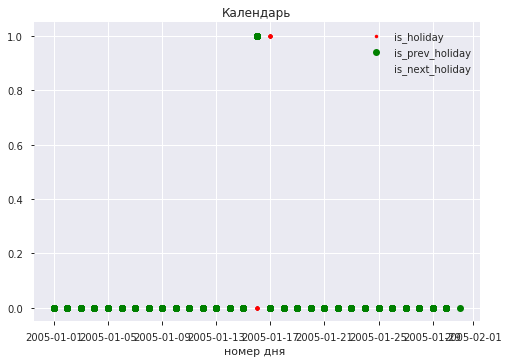

In [146]:
plt.plot(data.iloc[:30*24].index.get_level_values('Date'),data['is_holiday'].values[:30*24],'.r',label = 'is_holiday')
plt.plot(data.iloc[:30*24].index.get_level_values('Date'),data['is_prev_holiday'].values[:30*24],'og',label = 'is_prev_holiday')
plt.plot(data.iloc[:30*24].index.get_level_values('Date'), data['is_next_holiday'].values[:30*24],'+b',label = 'is_next_holiday')
plt.legend()
plt.title('Календарь')
plt.xlabel('номер дня ')
plt.show()

In [147]:
# сделаем функцию и 
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

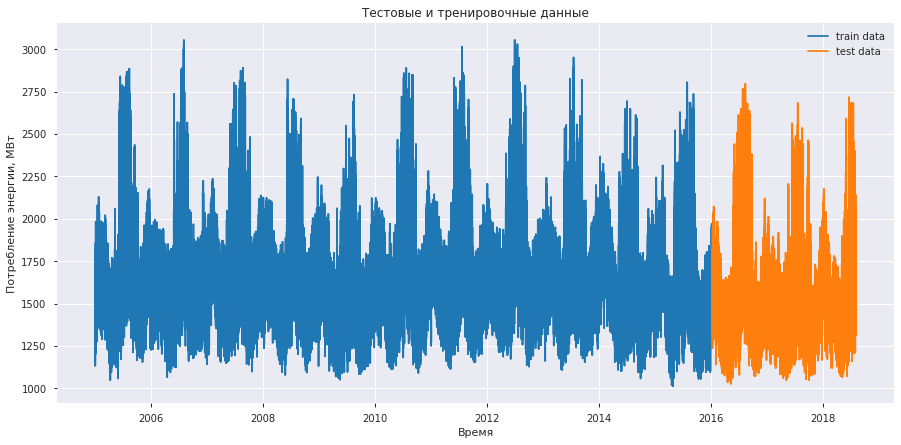

In [149]:
train, test = split_data( data, '01-06-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['DUQ_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['DUQ_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [151]:
X_train = train
y_train = train['DUQ_MW'].values
X_test = test
y_test = test['DUQ_MW'].values
X_train.drop( columns = 'DUQ_MW', inplace = True )
X_test.drop( columns = 'DUQ_MW', inplace = True )

In [152]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [153]:
model_l = LinearRegression()
model_f = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

In [157]:
model_l.fit( X_train, y_train )
model_f.fit( X_train, y_train )
model_g.fit( X_train, y_train ) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [158]:
X_test_pred_l = model_l.predict(X_test)
X_test_pred_f = model_f.predict(X_test)
X_test_pred_g = model_g.predict(X_test)

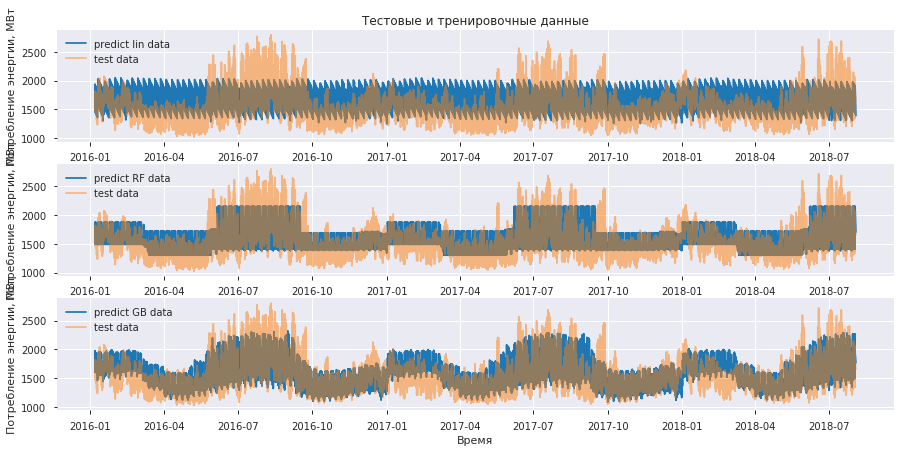

In [159]:

plt.figure( figsize=( 15, 7 ))
plt.subplot(3,1,1)

plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index.get_level_values('Date'),X_test_pred_l, label='predict lin data' )
plt.plot(test.index.get_level_values('Date'),y_test, label='test data', alpha = 0.5)
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.subplot(3,1,2)

plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index.get_level_values('Date'),X_test_pred_f, label='predict RF data' )
plt.plot(test.index.get_level_values('Date'),y_test, label='test data', alpha = 0.5)

plt.legend()
plt.subplot(3,1,3)
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index.get_level_values('Date'),X_test_pred_g, label='predict GB data' )
plt.plot(test.index.get_level_values('Date'),y_test, label='test data', alpha = 0.5)

plt.legend()
plt.show()

In [160]:
er_l = mean_squared_error(y_true=y_test, y_pred=X_test_pred_l) 
er_f = mean_squared_error(y_true=y_test, y_pred=X_test_pred_f) 
er_g = mean_squared_error(y_true=y_test, y_pred=X_test_pred_g)

print('ошибка линейной регрессии :  ', er_l,'\nошибка случайного леса  :  ', er_f,'\nошибка градиентного бустинга :  ', er_g)

ошибка линейной регрессии :   78650.56435314933 
ошибка случайного леса  :   48815.42808047987 
ошибка градиентного бустинга :   39563.40645077237


In [161]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [162]:

er_l = mean_absolute_percentage_error(y_true=y_test, y_pred=X_test_pred_l) 
er_f = mean_absolute_percentage_error(y_true=y_test, y_pred=X_test_pred_f) 
er_g = mean_absolute_percentage_error(y_true=y_test, y_pred=X_test_pred_g)

print('ошибка линейной регрессии :  ', er_l,'\nошибка случайного леса  :  ', er_f,'\nошибка градиентного бустинга :  ', er_g)

ошибка линейной регрессии :   15.152614303574035 
ошибка случайного леса  :   11.981935579769889 
ошибка градиентного бустинга :   9.996354000540064


In [163]:
brent_data.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


In [164]:
brent_data.index.nunique() == brent_data.shape[0]

True

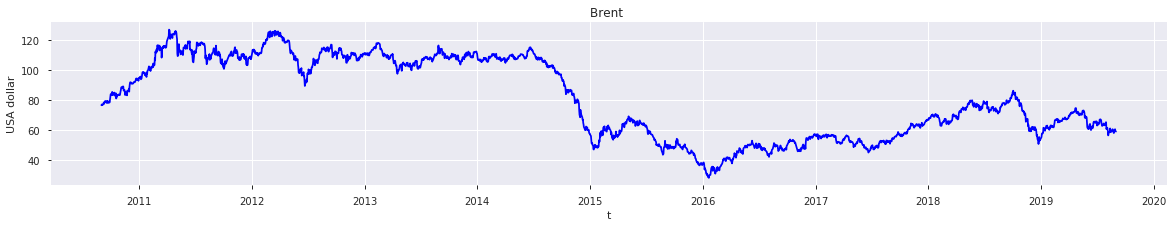

In [165]:
brent_data  = brent_data.sort_index()
plt.figure( figsize=( 20, 3))
plt.plot(brent_data.index, brent_data['Значение'],'b' )
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.title('Brent ')
plt.show()

In [166]:
brent_data['data'] = brent_data.index
brent_data['year'] = brent_data['data'].dt.year
brent_data['month'] = brent_data['data'].dt.month
brent_data['dayofmonth'] = brent_data['data'].dt.day
brent_data['quarter'] = brent_data['data'].dt.quarter
brent_data['dayofyear'] = brent_data['data'].dt.dayofyear
brent_data['weekofyear'] = brent_data['data'].dt.weekofyear
brent_data['dayofweek'] = brent_data['data'].dt.dayofweek

In [167]:
brent_data['is_holiday'] = brent_data.index.isin([d.date() for d in cal.holidays()])
brent_data['is_prev_holiday'] = brent_data.index.isin([( d.date() - one_day ) for d in cal.holidays()])
brent_data['is_next_holiday'] = brent_data.index.isin([( d.date() + one_day ) for d in cal.holidays()])
brent_data['is_holiday'] = brent_data['is_holiday'].astype('uint8')
brent_data['is_prev_holiday'] = brent_data['is_prev_holiday'].astype('uint8')
brent_data['is_next_holiday'] = brent_data['is_next_holiday'].astype('uint8')

In [168]:
brent_data = brent_data.drop('data', axis = 1)
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [169]:
# сделаем функцию 
def split_data_b( data, split_date ):
    return data.loc[data.index <= split_date].copy(), \
           data.loc[data.index >  split_date].copy()

In [170]:
train_b, test_b = split_data_b( brent_data, '10-10-2018')

X_train_b = train_b
y_train_b = train_b['Значение'].values
X_test_b = test_b
y_test_b = test_b['Значение'].values
X_train_b.drop( columns = 'Значение', inplace = True )
X_test_b.drop( columns = 'Значение', inplace = True )


In [171]:
model_lb = LinearRegression()
model_fb = RandomForestRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)

In [172]:
model_lb.fit( X_train_b, y_train_b )
model_fb.fit( X_train_b, y_train_b )
model_gb.fit( X_train_b, y_train_b ) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=15,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [173]:
X_test_pred_lb = model_lb.predict(X_test_b)
X_test_pred_fb = model_fb.predict(X_test_b)
X_test_pred_gb = model_gb.predict(X_test_b)

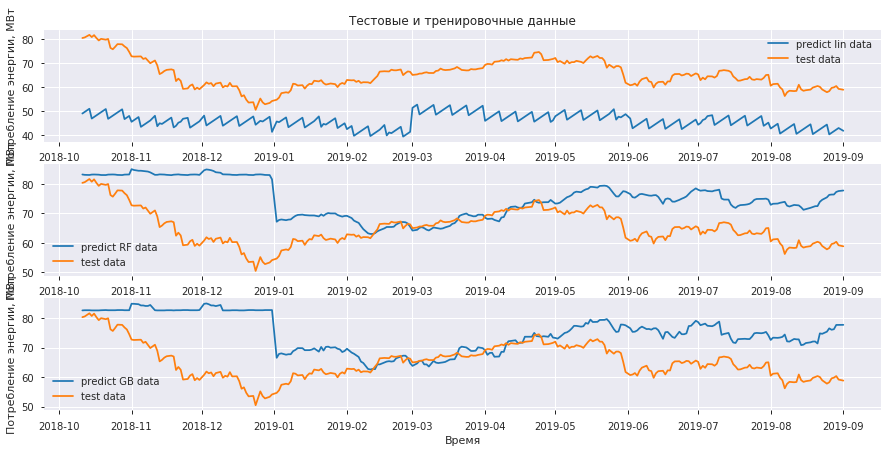

In [174]:
plt.figure( figsize=( 15, 7 ))
plt.subplot(3,1,1)

plt.ylabel('Потребление энергии, МВт')
plt.plot(test_b.index,X_test_pred_lb, label='predict lin data' )
plt.plot(test_b.index,y_test_b, label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.subplot(3,1,2)

plt.ylabel('Потребление энергии, МВт')
plt.plot(test_b.index,X_test_pred_fb, label='predict RF data' )
plt.plot(test_b.index,y_test_b, label='test data')

plt.legend()
plt.subplot(3,1,3)
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test_b.index,X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index,y_test_b, label='test data')

plt.legend()
plt.show()

In [175]:
data.to_csv("my_DUQ_hourly.csv")

# Задание
Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

Text(0.5, 0, 't')

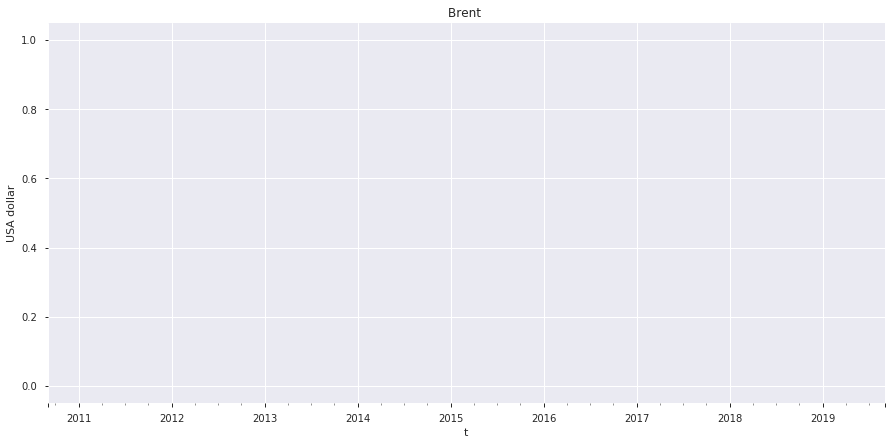

In [90]:
brent_data_d = brent_data.copy().resample("D").std()
_ = brent_data_d['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

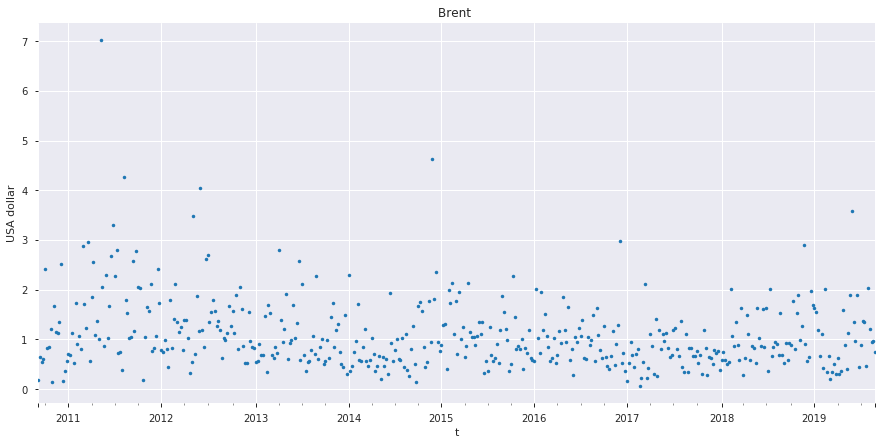

In [92]:
brent_data_w = brent_data.copy().resample("W").std()
_ = brent_data_w['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

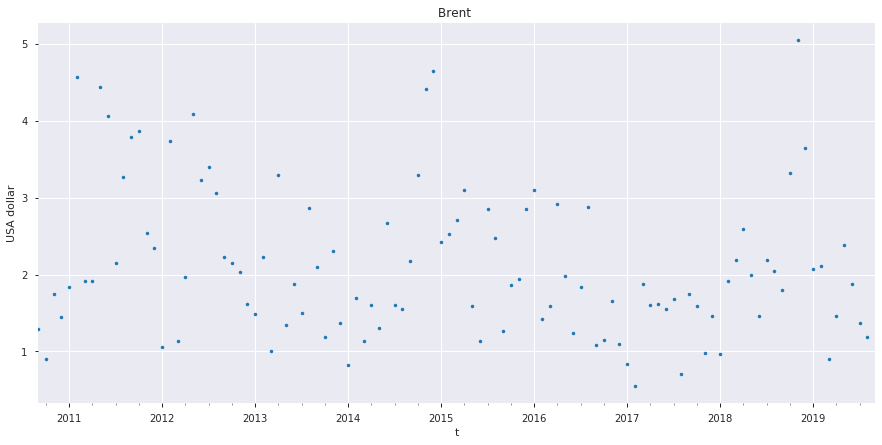

In [85]:
brent_data_m = brent_data.copy().resample("M").std()
_ = brent_data_m['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

# Задание
Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

На недельных и месячных графиках изменение цены стало более резким, в отличии от дневных графиков, где из-за количества записей, переход от цены к цене идёт более мелкими шагами